In [94]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import color_sequences as cs
import glob

YEAR = '2015'

In [95]:
paths = glob.glob(f'data\\{YEAR}\\*.csv')
data = pd.concat((pd.read_csv(f) for f in paths), ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          822 non-null    object 
 1   Authors                 726 non-null    object 
 2   Author Affiliations     726 non-null    object 
 3   Publication Title       822 non-null    object 
 4   Date Added To Xplore    822 non-null    object 
 5   Publication Year        822 non-null    int64  
 6   Volume                  822 non-null    int64  
 7   Issue                   822 non-null    int64  
 8   Start Page              822 non-null    object 
 9   End Page                822 non-null    object 
 10  Abstract                822 non-null    object 
 11  ISSN                    822 non-null    object 
 12  ISBNs                   0 non-null      float64
 13  DOI                     822 non-null    object 
 14  Funding Information     438 non-null    ob

In [96]:
data.dropna(how='all', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          822 non-null    object 
 1   Authors                 726 non-null    object 
 2   Author Affiliations     726 non-null    object 
 3   Publication Title       822 non-null    object 
 4   Date Added To Xplore    822 non-null    object 
 5   Publication Year        822 non-null    int64  
 6   Volume                  822 non-null    int64  
 7   Issue                   822 non-null    int64  
 8   Start Page              822 non-null    object 
 9   End Page                822 non-null    object 
 10  Abstract                822 non-null    object 
 11  ISSN                    822 non-null    object 
 12  DOI                     822 non-null    object 
 13  Funding Information     438 non-null    object 
 14  PDF Link                822 non-null    ob

In [97]:
data = data[['Authors', 'Author Affiliations', 'Publication Year', 'Funding Information', 'Author Keywords', 'IEEE Terms']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              726 non-null    object
 1   Author Affiliations  726 non-null    object
 2   Publication Year     822 non-null    int64 
 3   Funding Information  438 non-null    object
 4   Author Keywords      720 non-null    object
 5   IEEE Terms           740 non-null    object
dtypes: int64(1), object(5)
memory usage: 38.7+ KB


In [98]:
data.dropna(subset=['Authors', 'Author Affiliations'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              726 non-null    object
 1   Author Affiliations  726 non-null    object
 2   Publication Year     726 non-null    int64 
 3   Funding Information  438 non-null    object
 4   Author Keywords      720 non-null    object
 5   IEEE Terms           725 non-null    object
dtypes: int64(1), object(5)
memory usage: 34.2+ KB


In [99]:
data.to_csv(f'data\\{YEAR}\\aggregate\\combined.csv', encoding='utf-8', index=False)
data.head(5)

,Authors,Author Affiliations,Publication Year,Funding Information,Author Keywords,IEEE Terms
0,K. W. Leung,"City University of Hong Kong, Kowloon Tong, Ho...",2015,NaN,NaN,NaN
1,M. Li; K. -M. Luk,"State Key Laboratory of Millimeter Waves, City...",2015,NaN,complementary antennas;low profile antennas;mi...,Microstrip antennas;Dipole antennas;Microstrip...
2,K. Rasilainen; J. Ilvonen; A. Lehtovuori; J. -...,"Department of Radio Science and Engineering, S...",2015,Academy of Finland; Sähkötekniikan Korkeakoulu...,Antenna;detector;diode;harmonic radar;nonlinea...,Antennas;Harmonic analysis;Transponders;Schott...
3,Z. Li; E. Ahmed; A. M. Eltawil; B. A. Cetiner,Electrical and Computer Engineering Department...,2015,NaN,Beam-steering;reconfigurable antenna;full-wave...,PIN photodiodes;Gain;Antennas;Beam steering;Ra...
4,B. Liang; B. Sanz-Izquierdo; E. A. Parker; J. ...,"University of Kent, The School of Engineering ...",2015,NaN,Broadband antenna;circular polarization (CP);e...,Periodic structures;Metamaterials;Tuning;Broad...


In [100]:
countries = []

# with open('auth_aff.txt', 'w', encoding='utf-8') as f:
largest = [0, 0]
for i in range(data.shape[0]):
    authors = data ['Authors'][i].split('; ')
    affiliations = data['Author Affiliations'][i].split('; ')
    largest = [max([largest[0], len(authors)]), i if largest[0] < len(authors) else largest[1]]
    for author, aff in zip(authors, affiliations, strict=True):
        # f.write(f'{author}: {aff}\n')
        if aff == 'NA':
            print(author)
        # if aff.split(', ')[-1] in ():
        #     print(f'{author}: {aff}')
        countries.append(aff.split(', ')[-1])

In [101]:
south_korea = ('Republic of Korea', 'Korea',)
uae = ('United Arab Emirates',)
turkey = ('Türkiye', 'Türkey', 'TR',)
hong_kong = ('Hong Kong SAR', 'Hong Kong SAR China')
the_netherlands = ('Netherlands', 'The Netherland',)
sar_china = ('SAR',)
uk = ('U.K', 'UK', 'United Kingdom', 'WC1E 6BT', )
china = ('China,', "People's Republic of China", 'P. R. China', 'China.', 'Fuzhou', 'Shanxi',)
czechia = ('the Czech Republic',)
usa = ('USA.', 'NC', 'NM', 'WI', 'CA', 'VA', 'United States', 'Princeton University', 'Zipreel Inc.', 'Berkeley', 'Massachusetts Institute of Technology')
italy = ('Italy.',)
macau = ('Macao',)
singapore = ('Nanyang Technological University', 'SG',)
canada = ('Irdeto Canada',)
taiwan = ('ROC', 'R.O.C', 'R.O.C.')
lebanon = ('Louaize',)
ireland = ('Antenna High Frequency Research Centre',)
spain = ('Universidad de Oviedo', 'ES',)
belgium = ('Louvain-la-Neuve',)
australia = ('AU',)
serbia = ('RS',)
algeria = ('Algérie',)

In [102]:
countries = pd.Series(countries, dtype=str)
countries = countries.replace(south_korea, 'South Korea')
countries = countries.replace(uae, 'UAE')
countries = countries.replace(turkey, 'Turkey')
countries = countries.replace(hong_kong, 'Hong Kong')
countries = countries.replace(the_netherlands, 'The Netherlands')
countries = countries.replace(sar_china, 'SAR China')
countries = countries.replace(uk, 'U.K.')
countries = countries.replace(china, 'China')
countries = countries.replace(czechia, 'Czech Republic')
countries = countries.replace(usa, 'USA')
countries = countries.replace(italy, 'Italy')
countries = countries.replace(macau, 'Macau')
countries = countries.replace(singapore, 'Singapore')
countries = countries.replace(canada, 'Canada')
countries = countries.replace(taiwan, 'Taiwan')
countries = countries.replace(lebanon, 'Lebanon')
countries = countries.replace(ireland, 'Ireland')
countries = countries.replace(spain, 'Spain')
countries = countries.replace(belgium, 'Belgium')
countries = countries.replace(australia, 'Australia')
countries = countries.replace(serbia, 'Serbia')
countries = countries.replace(algeria, 'Algeria')
print(countries.info())
countries = countries[countries != 'NA']
print(countries.info())
counts = countries.value_counts()
# counts = counts[counts >= 10]
print(counts)
labels = list(counts.keys())
values = list(counts.values)
counts.to_csv('look.csv')

<class 'pandas.core.series.Series'>
RangeIndex: 2625 entries, 0 to 2624
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
2625 non-null   object
dtypes: object(1)
memory usage: 20.6+ KB
None
<class 'pandas.core.series.Series'>
Index: 2625 entries, 0 to 2624
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
2625 non-null   object
dtypes: object(1)
memory usage: 41.0+ KB
None
China              591
USA                444
France             170
Italy              154
Canada             120
Spain              105
U.K.               101
India               86
Germany             78
South Korea         70
Taiwan              65
Australia           61
Singapore           61
Hong Kong           54
Finland             50
Japan               46
Belgium             45
Iran                44
The Netherlands     33
Turkey              27
Sweden              23
Portugal            21
Ireland             21
Czech Republic      17
Denmark             16
Ukraine             

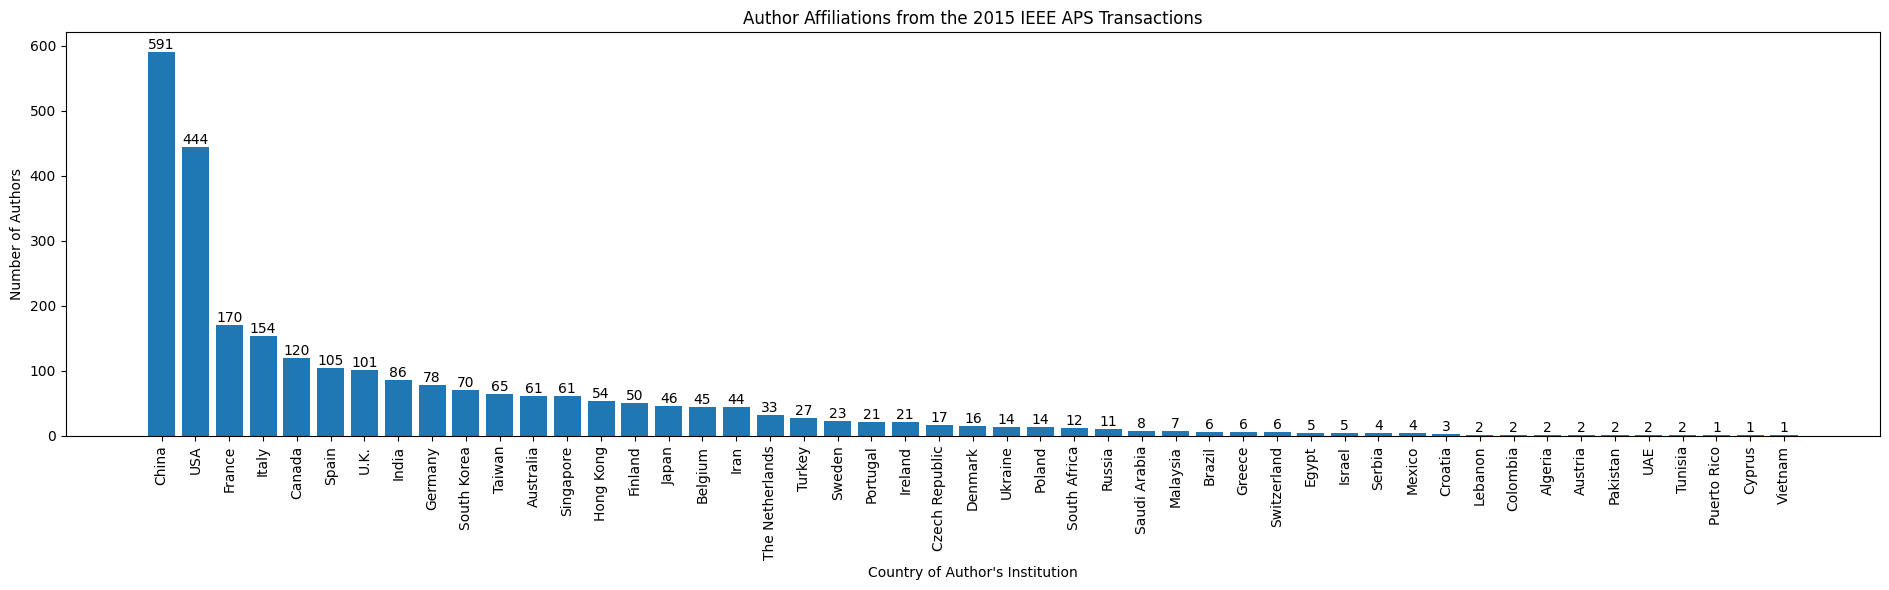

In [103]:
fig, ax = plt.subplots(figsize=(19, 6))
bar_cont = ax.bar(labels, values)
# ax.set(ylim=(0, 1999))
plt.xlabel('Country of Author\'s Institution')
plt.ylabel('Number of Authors')
plt.title(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.xticks(rotation=90)
ax.bar_label(bar_cont)
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_by_country.png', bbox_inches='tight')
plt.show()

In [104]:
super_counts = counts[counts >= 75]
full = counts.sum()
filtered = super_counts.sum()

super_counts['All Other Countries'] = full - filtered

labels = list(super_counts.keys())
values = list(super_counts.values)


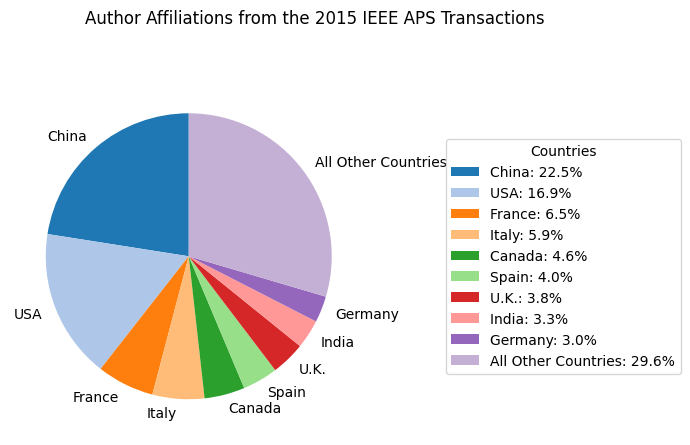

In [105]:

fig, ax = plt.subplots()
wedges, texts = ax.pie(values, labels=labels, startangle=90, colors=cs['tab20'])
percent = [f'{label}: {value/sum(values) * 100:.1f}%' for label, value in zip(labels, values, strict=True)]
ax.legend(wedges, percent, title='Countries', loc='center left', bbox_to_anchor=(1.2, 0, 0.5, 1))
fig.suptitle(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png', bbox_inches='tight')
plt.show()